In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
!pip install xlrd

In [3]:
link="https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"

In [4]:
df=pd.read_excel(link)

In [5]:
quest_shark=df.copy()

In [6]:
quest_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
quest_shark.shape

(6969, 23)

In [8]:
quest_shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

# Cleaning Data:
- We will remove the columns that we will not need.
- We will remove rows from the DataFrame quest_shark where all values in the row are missing (NaN).
- We will remove rows from the DataFrame quest_shark that have less than 8 non-null values.
- We will check if we have ducplicates and remove them from our DataFrame




In [9]:
quest_shark.columns=quest_shark.columns.str.lower().str.replace(" ","_")

In [10]:
quest_shark=quest_shark.drop(columns=['unnamed:_22','unnamed:_21','original_order','case_number.1','case_number',
                       'href','href_formula','pdf','unnamed:_11','source'])


In [11]:
quest_shark.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8'
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'"


In [12]:
quest_shark.shape

(6969, 13)

In [13]:
quest_shark.dropna(how="all",inplace=True)

In [14]:
quest_shark.shape

(6944, 13)

In [15]:
quest_shark=quest_shark.dropna(thresh=7)

In [16]:
quest_shark.shape

(6920, 13)

In [17]:
quest_shark=quest_shark.dropna(subset='year')

In [18]:
quest_shark['year'] =quest_shark['year'].astype(str)
quest_shark['year'] =quest_shark["year"].str.replace(".0", "")

In [19]:
quest_shark['year'].value_counts()

year
2015    143
2017    139
2016    131
2011    128
0       127
       ... 
1780      1
1779      1
1857      1
1823      1
1771      1
Name: count, Length: 254, dtype: int64

In [20]:
quest_shark.duplicated().sum()

2

In [21]:
quest_shark=quest_shark.drop_duplicates()

In [22]:
len(quest_shark)

6916

#### Cleaning Columns:
We used a for loop to check what do we have inside each column we will need in our studies for "MARILM"
- After cleaning the sex ,we create a pie plot showing the distribution of victims by sex using the 'sex' column from our DataFrame quest_shark.
- We cleaned the Age , with filling the none values with 'ffill methode' which is filling with forward value.
- We cleaned the injuries column according to the severity of the injury, same thing for the activities, we tried to clean them according to similar activities , and we put them in a list , that we used to replace with it in our column to have it more clear , better then have thousand of different activities. 
- For Species we used the ame method we used in activities and injuries plus 'mapped method', to cretae a new species of shark which is the "Great Shark", 70% of the attacks are made by white shark, great shark and tiger shark.
- The mapped method we also used it for cleaning the type of attacks. 


In [23]:
list_sex=quest_shark.sex.unique()
for sex in list_sex:
    print(sex)

F
M
nan
 M
M 
lli
M x 2
N
.


In [24]:
sex_mapped={'M ':'M','N':'M',' M':'M','.':'M','M x 2':'M','lli':'M'}
quest_shark['sex'].replace(sex_mapped, inplace= True)
quest_shark['sex'].fillna('F/M', inplace=True)
quest_shark['sex'].value_counts()

sex
M      5576
F       779
F/M     561
Name: count, dtype: int64

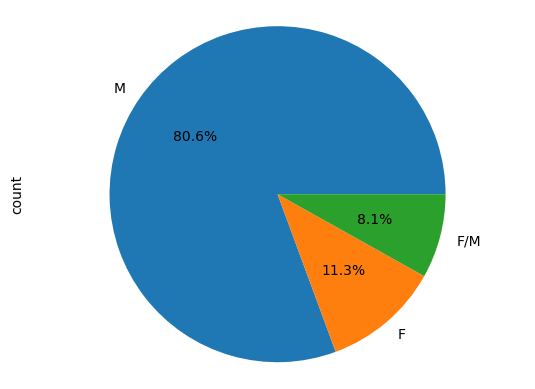

In [25]:
sex_of_victims=quest_shark.sex.value_counts()

sex_of_victims.plot.pie(autopct='%.1f%%')
plt.axis('equal')
plt.show()

In [26]:
quest_shark.isnull().any()

date        False
year        False
type         True
country      True
state        True
location     True
activity     True
name         True
sex         False
age          True
injury       True
time         True
species_     True
dtype: bool

In [27]:
quest_shark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6916 entries, 0 to 6943
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6916 non-null   object
 1   year      6916 non-null   object
 2   type      6898 non-null   object
 3   country   6872 non-null   object
 4   state     6455 non-null   object
 5   location  6372 non-null   object
 6   activity  6345 non-null   object
 7   name      6712 non-null   object
 8   sex       6916 non-null   object
 9   age       3949 non-null   object
 10  injury    6886 non-null   object
 11  time      3418 non-null   object
 12  species_  3809 non-null   object
dtypes: object(13)
memory usage: 756.4+ KB


In [28]:
quest_shark.value_counts('age')

age
19          89
16          89
17          88
17          85
15          84
            ..
21 or 26     1
21 & ?       1
20?          1
20/30        1
             1
Name: count, Length: 243, dtype: int64

In [29]:
quest_shark.age.fillna(method='ffill', inplace=True)

In [30]:
quest_shark.value_counts('age')

age
16          203
18          197
17          194
15          173
17          163
           ... 
30 or 36      1
30 & 32       1
28 & 26       1
28 & 22       1
              1
Name: count, Length: 243, dtype: int64

In [ ]:
list_age=quest_shark.age.unique()
for age in list_age:
    print(age)

In [32]:
#Is it possible to do split by and or &?
quest_shark.age.astype(str)
quest_shark.age=quest_shark.age.str.replace('mid-30s',"35").str.replace('mid-20s',"25")
quest_shark.age=quest_shark.age.str.replace("20's","25").str.replace("60's","65").str.replace("60s","65").str.replace("30s","35").str.replace("40s","45").str.replace("50s","55").str.replace("20s","25")
quest_shark.age=quest_shark.age.str.replace("20/30","25")
quest_shark.age=quest_shark.age.str.replace("teen","15",case=False).str.replace("Elderly","60").str.replace("adult","").str.replace("(adult)","").str.replace('"middle-age"',"35").str.replace("young","22").str.replace('"young"',"22")
quest_shark.age=quest_shark.age.str.replace("Ca. ","").str.replace("MAKE LINE GREEN","29").str.replace("A.M","")
quest_shark.age=quest_shark.age.str.replace("!","").str.replace(" months","").str.replace("a minor","12").str.replace("15s","15")
quest_shark.age=quest_shark.age.str.replace("20?","20").str.replace(">","").str.replace("X","").str.replace("F","").str.replace('"22"',"22").str.replace("6½","6").str.replace("2½","2").str.replace("30 or 36","30").str.replace("32 & 30","32")
quest_shark.age=quest_shark.age.str.replace("nan","29").str.replace("20/30","25").str.replace("45 and 15", "45").str.replace("28 & 22","28").str.replace("22, 57, 31","57").str.replace("9 & 60","9").str.replace("28 & 26","28").str.replace("18 or 20", "19").str.replace("12 or 13","12").str.replace("46 & 34", "46").str.replace("28, 23 & 30","28") .str.replace("36 & 26", "36").str.replace("8 or 10","8").str.replace("21 & ?","21").str.replace("33 or 37","33").str.replace("23 & 20","23").str.replace("7      &    31","7").str.replace("16 to 18","16").str.replace("21 or 26","21").str.replace("18 to 22","18").str.replace("9 & 12","9").str.replace("? & 19","19").str.replace("25 to 35","25").str.replace("23 & 26","23").str.replace("33 & 37","33").str.replace("25 or 28","25").str.replace("37, 67, 35, 27,  ? & 27","35").str.replace("21, 34,24 & 35","34").str.replace("30 & 32","30").str.replace("50 & 30","50").str.replace("17 & 35","17").str.replace("13 or 18","13").str.replace("34 & 19","34").str.replace("33 & 26","33").str.replace("2 to 3","2").str.replace("7 or 8","7").str.replace("17 & 16","17").str.replace("Both 11","11").str.replace("9 or 10","9").str.replace("36 & 23","36").str.replace("?    &   14","14").str.replace("10 or 12","10").str.replace("31 or 33","31").str.replace("13 or 14","13")
quest_shark.age=quest_shark.age.str.replace("nan","29").str.replace("M","29").str.replace("()","").str.replace(".","29").str.replace(" ","")

In [33]:
quest_shark.value_counts('age')

age
18    201
15    200
17    167
21    161
22    154
     ... 
69      1
81      1
86      1
87      1
        1
Name: count, Length: 80, dtype: int64

In [34]:
quest_shark.eq(" ").sum()

date        0
year        0
type        0
country     0
state       0
location    0
activity    1
name        0
sex         0
age         0
injury      1
time        2
species_    7
dtype: int64

In [35]:
quest_shark.eq("nan ").sum()

date        0
year        0
type        0
country     0
state       0
location    0
activity    0
name        0
sex         0
age         0
injury      0
time        0
species_    0
dtype: int64

In [36]:
quest_shark.isna().sum()

date           0
year           0
type          18
country       44
state        461
location     544
activity     571
name         204
sex            0
age         3363
injury        30
time        3498
species_    3107
dtype: int64

In [ ]:
list_age=quest_shark.age.unique()
for age in list_age:
    print(age)

In [38]:
quest_shark.value_counts('injury')

injury
FATAL                                                       858
Foot bitten                                                 100
Survived                                                     97
No injury                                                    85
Leg bitten                                                   81
                                                           ... 
Hooked shark bit his leg. PROVOKED INCIDENT                   1
Hooked shark bit his nose, arm and leg PROVOKED INCIDENT      1
Hooked shark bit rudder PROVOKED INCIDENT                     1
Hooked shark bit stern  PROVOKED INCIDENT                     1
“Put hand through hatch, shark nearly bit off thumb”          1
Name: count, Length: 4068, dtype: int64

In [ ]:
list_injury=quest_shark.injury.unique()
for injury in list_injury:
    print(injury)

In [40]:
quest_shark.injury.fillna("unknown", inplace=True)

In [41]:
quest_shark.value_counts('injury')

injury
FATAL                                                       858
Foot bitten                                                 100
Survived                                                     97
No injury                                                    85
Leg bitten                                                   81
                                                           ... 
Hooked shark bit his leg. PROVOKED INCIDENT                   1
Hooked shark bit his nose, arm and leg PROVOKED INCIDENT      1
Hooked shark bit rudder PROVOKED INCIDENT                     1
Hooked shark bit stern  PROVOKED INCIDENT                     1
“Put hand through hatch, shark nearly bit off thumb”          1
Name: count, Length: 4068, dtype: int64

In [42]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
quest_shark.loc[quest_shark.injury.str.contains("fatal|no survivors|dead|died|kill|killed", case=False, na=False),"injury"]="Fatal"
quest_shark.loc[quest_shark.injury.str.contains("severed|severe|serious", case=False, na=False),"injury"]="Severe Injury"
quest_shark.loc[quest_shark.injury.str.contains("laceration|lacerations", case=False, na=False),"injury"]="Lacerations"
quest_shark.loc[quest_shark.injury.str.contains("puncture|punctures", case=False, na=False),"injury"]="Punctures"
quest_shark.loc[quest_shark.injury.str.contains("cut|cuts", case=False, na=False),"injury"]="Cuts"
quest_shark.loc[quest_shark.injury.str.contains("drowning|drowned", case=False, na=False),"injury"]="Drowning"
quest_shark.loc[quest_shark.injury.str.contains("amputated", case=False, na=False),"injury"]="Amputated"
quest_shark.loc[quest_shark.injury.str.contains("no injury|no injuries", case=False, na=False),"injury"]="No Injury"
quest_shark.loc[quest_shark.injury.str.contains("bit|bitten|bite", case=False, na=False),"injury"]="Bitten"
quest_shark.loc[quest_shark.injury.str.contains("kayak|boat|surfboard", case=False, na=False),"injury"]="Material Damage"
quest_shark.loc[quest_shark.injury.str.contains("injury|injuries|injured", case=False, na=False),"injury"]="Injury"
injuries_list=["Fatal","Lacerations","Bitten","Punctures","Cuts","Drowning","Amputated","Severe Injury","No Injury","Injury","Material Damage"]

In [43]:
quest_shark.injury=quest_shark.injury.apply(lambda x: x if x in injuries_list else "Others")

In [44]:
quest_shark.value_counts('injury')

injury
Injury             1691
Fatal              1471
Bitten             1360
Others             1018
Lacerations         907
Punctures           198
Drowning            109
Cuts                 74
Amputated            48
Material Damage      40
Name: count, dtype: int64

Text(0.5, 1.0, 'Injuries List')

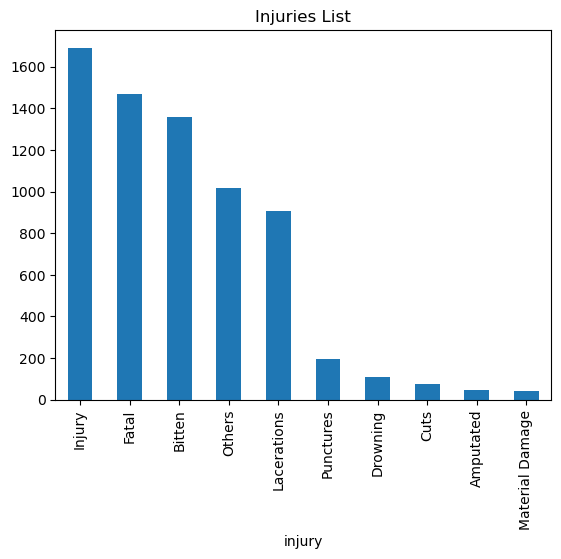

In [45]:
injury_graph=quest_shark.value_counts('injury')
injury_graph.plot.bar()
plt.title("Injuries List")

In [46]:
quest_shark.value_counts("activity")

activity
Surfing                                                                         1121
Swimming                                                                         974
Fishing                                                                          487
Spearfishing                                                                     379
Wading                                                                           174
                                                                                ... 
Fishing, thrown into water by heavy sea, clinging to rocks at the water line       1
Fishing, stepped on hooked shark's head                                            1
Fishing, standing in water washing fish                                            1
Fishing, standing in water next to purse net                                       1
yachtsman in a zodiac                                                              1
Name: count, Length: 1581, dtype: int64

In [ ]:
list_activity=quest_shark.activity.unique()
for activity in list_activity:
    print(activity)

In [48]:
quest_shark.injury.fillna("unknown", inplace=True)

In [49]:
quest_shark.loc[quest_shark.activity.str.contains("surf|paddle|bodyboard|SUP|board", case=False, na=False),"activity"]="Surfing"
quest_shark.loc[quest_shark.activity.str.contains("fishing|fihing", case=False, na=False),"activity"]="Fishing"
quest_shark.loc[quest_shark.activity.str.contains("swimming|float|swim", case=False, na=False),"activity"]="Swimming"
quest_shark.loc[quest_shark.activity.str.contains("filming|selfie|photo", case=False, na=False),"activity"]="Multimedia"
quest_shark.loc[quest_shark.activity.str.contains("wading|walking|walk", case=False, na=False),"activity"]="Wading"
quest_shark.loc[quest_shark.activity.str.contains("diving|dive|cage|snorkeling|snork", case=False, na=False),"activity"]="Diving"
quest_shark.loc[quest_shark.activity.str.contains("kayak", case=False, na=False),"activity"]="Kayaking"
quest_shark.loc[quest_shark.activity.str.contains("bath", case=False, na=False),"activity"]="Bathing"
quest_shark.loc[quest_shark.activity.str.contains("disaster", case=False, na=False),"activity"]="Sea Disaster"
activities_list=["Surfing", "Fishing", "Swimming", "Multimedia", "Wading", "Diving", "Kayaking", "Bathing","Sea Disaster"]

In [50]:
quest_shark.activity=quest_shark.activity.apply(lambda x:x if x in activities_list else "Others")

In [51]:
activities_list=quest_shark.activity.unique()
activities_list

array(['Swimming', 'Surfing', 'Others', 'Fishing', 'Diving', 'Wading',
       'Multimedia', 'Kayaking', 'Bathing', 'Sea Disaster'], dtype=object)

In [52]:
quest_shark.value_counts("activity")

activity
Surfing         1783
Others          1473
Swimming        1247
Fishing         1234
Diving           685
Wading           208
Bathing          190
Kayaking          42
Sea Disaster      30
Multimedia        24
Name: count, dtype: int64

Text(0.5, 1.0, 'Activities List')

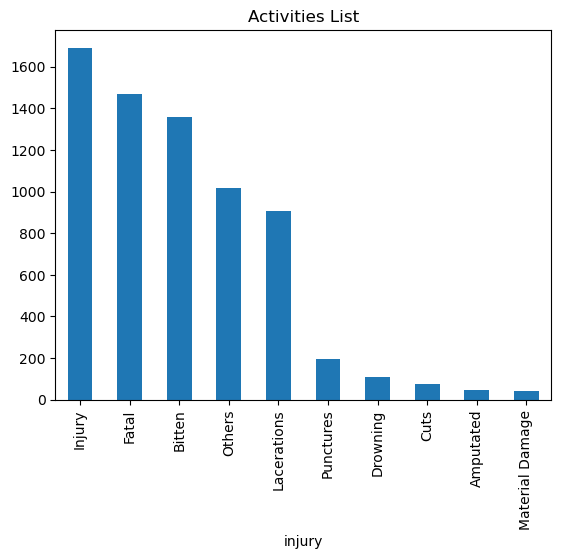

In [53]:
activity_graph=quest_shark.value_counts('injury')
activity_graph.plot.bar()
plt.title("Activities List")

In [54]:
count_sex_activity = quest_shark.groupby(['sex', 'activity']).size().reset_index(name='count')

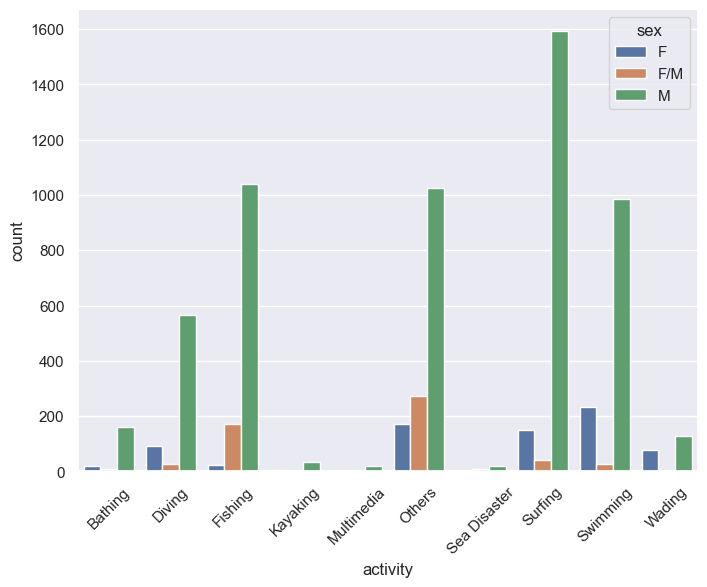

In [98]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(x='activity', y='count', hue='sex', data=count_sex_activity)
plt.xticks(rotation=45)
plt.show()

In [ ]:
list_species=quest_shark.species_.unique()
for species_ in list_species:
    print(species_)

In [57]:
species_mapped={
    'Shark involvement prior to death was not confirmed': 'Great shark',
    'Invalid': 'Great shark',
    'Shark involvement not confirmed': 'Great shark',
    'Shark involvement prior to death unconfirmed': 'Great shark',
    }

quest_shark['species_'].fillna('Unknown shark', inplace=True)
quest_shark.loc[quest_shark['species_'].str.contains('hite', case=False, na=False), 'species_'] = 'White shark'
quest_shark.loc[quest_shark['species_'].str.contains('tiger', case=False, na=False), 'species_'] = 'Tiger shark'
quest_shark.loc[quest_shark['species_'].str.contains('bull', case=False, na=False), 'species_'] = 'Bull shark'
quest_shark.loc[quest_shark['species_'].str.contains('lemon', case=False, na=False), 'species_'] = 'Lemon shark'
quest_shark.loc[quest_shark['species_'].str.contains('blacktip', case=False, na=False), 'species_'] = 'Blacktip shark'
quest_shark.loc[quest_shark['species_'].str.contains('carribe', case=False, na=False), 'species_'] = 'Carribean shark'
quest_shark.loc[quest_shark['species_'].str.contains('blue', case=False, na=False), 'species_'] = 'Blue shark'
quest_shark.loc[quest_shark['species_'].str.contains('bronze', case=False, na=False), 'species_'] = 'Bronze shark'
quest_shark.loc[quest_shark['species_'].str.contains('spinner', case=False, na=False), 'species_'] = 'Spinner shark'
quest_shark.loc[quest_shark['species_'].str.contains('nurse', case=False, na=False), 'species_'] = 'Nurse shark'
quest_shark.loc[quest_shark['species_'].str.contains('hammer', case=False, na=False), 'species_'] = 'Hammerhead shark'
quest_shark.loc[quest_shark['species_'].str.contains('mako', case=False, na=False), 'species_'] = 'Mako shark'
quest_shark.loc[quest_shark['species_'].str.contains('brow', case=False, na=False), 'species_'] = 'Brown shark'
quest_shark.loc[quest_shark['species_'].str.contains('dusk', case=False, na=False), 'species_'] = 'Dusky shark'
quest_shark.loc[quest_shark['species_'].str.contains('ceanic', case=False, na=False), 'species_'] = 'oceanic Whitetip shark'
quest_shark.loc[quest_shark['species_'].str.contains('sand', case=False, na=False), 'species_'] = 'Sand shark'
quest_shark.loc[quest_shark['species_'].str.contains('whal', case=False, na=False), 'species_'] = 'Whale shark'
quest_shark.loc[quest_shark['species_'].str.contains('grey', case=False, na=False), 'species_'] = 'Grey shark'
quest_shark.loc[quest_shark['species_'].str.contains("1'|1-|1.|2'|2-|2.|3'|3-|3.", case=False, na=False), 'species_'] = 'S/M sharks'
quest_shark.loc[quest_shark['species_'].str.contains("4'|4-|4.|5'|5-|5.|6'|6-|6.|7'|7-|7.|8'|8-|8.", case=False, na=False), 'species_'] = 'Moderate-sized sharks'
quest_shark.loc[quest_shark['species_'].str.contains("9'|9-|9.|10'|10-|10.|11'|11-|11.|12'|12-|12.|13'|13-|13.", case=False, na=False), 'species_'] = 'Giant sharks'


list_species=['White shark','Tiger shark','Bull shark','Lemon shark','Blacktip shark','Carribean shark','Moderate-sized sharks','Dusky shark','Blue shark','Brown shark','Bronze shark',
             'Nurse shark','Spinner shark','Hammerhead shark','Mako shark','Giant sharks','Sand shark','Grey shark','S/M sharks','Whale shark','oceanic Whitetip shark']





In [58]:
quest_shark['species_'].replace({**{species: species for species in list_species}, **species_mapped}, inplace=True)

for idx, value in quest_shark['species_'].items():
 
    if value not in list_species and value not in species_mapped.values():
       
        quest_shark.at[idx, 'species_'] = 'Unknown shark'


print(quest_shark['species_'])

0         Tiger shark
1         Tiger shark
2          S/M sharks
3         Tiger shark
4          Bull shark
            ...      
6939    Unknown shark
6940    Unknown shark
6941    Unknown shark
6942    Unknown shark
6943    Unknown shark
Name: species_, Length: 6916, dtype: object


In [59]:
print(quest_shark.value_counts('species_'))

species_
Unknown shark            3549
S/M sharks                791
White shark               740
Great shark               366
Tiger shark               330
Moderate-sized sharks     277
Bull shark                215
Blacktip shark            132
Nurse shark               112
Bronze shark               74
Blue shark                 61
Mako shark                 58
Hammerhead shark           49
Lemon shark                44
Grey shark                 28
Sand shark                 26
Spinner shark              24
Dusky shark                13
Giant sharks               11
Whale shark                10
Brown shark                 6
Name: count, dtype: int64


<Axes: ylabel='count'>

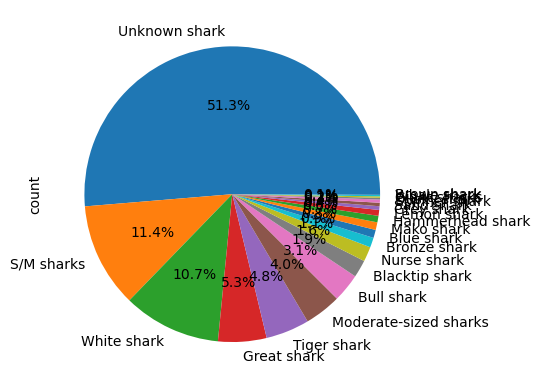

In [60]:
sharks=quest_shark.species_.value_counts()

sharks.plot.pie(autopct='%.1f%%')

In [61]:
quest_shark.value_counts('type')

type
Unprovoked             5091
Provoked                634
Invalid                 550
Watercraft              353
Sea Disaster            235
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Under investigation       1
Unverified                1
Name: count, dtype: int64

In [62]:
quest_shark['type'] = quest_shark['type'].replace([' Provoked', 'Boat'], 'provoked')
quest_shark['type'] = quest_shark['type'].replace(['?', 'Unconfirmed','Under investigation','Unverified'], 'Questionable')
quest_shark['type'].fillna('Invalid', inplace=True)

In [63]:
type_mapped={' Provoked':'Provoked',
            'Boat':'Provoked',
             'provoked':'Provoked',
            '?':'Questionable',
            'Unconfirmed':'Questionable',
            'Under Investigation':'Questionable',
            'Unverified':'Questionable'}
quest_shark['type'].replace(type_mapped, inplace= True)
quest_shark['type'].fillna('Invalid', inplace=True)

In [64]:
quest_shark.value_counts('type')

type
Unprovoked      5091
Provoked         643
Invalid          568
Watercraft       353
Sea Disaster     235
Questionable      26
Name: count, dtype: int64

Text(0.5, 1.0, 'type List')

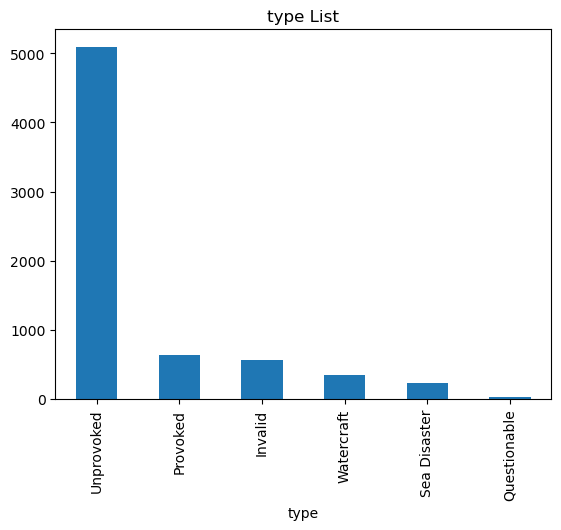

In [65]:
type_graph=quest_shark.value_counts('type')
type_graph.plot.bar()
plt.title("type List")

## Creating a new column:

We called this new column "sea" , and it contains the different sea's in the world surrounding the countries when the most of attacks happened.


In [66]:
conditions = [
    quest_shark['country'].str.contains('USA|mexico', case=False, na=False),
    quest_shark['country'].str.contains('argentin|Uruguay|Antarctica', case=False, na=False),
    quest_shark['country'].str.contains('Sweden|denmark|germany|Lithuania|Poland|Latvia|estonia', case=False, na=False),
    quest_shark['country'].str.contains('cuba|jamaica|Dominican rep|Venezuela|belize|colombia', case=False, na=False),
    quest_shark['country'].str.contains('New South Wales|Queensland|Victoria|Western Australia|South Australia|south africa', case=False, na=False),
    quest_shark['country'].str.contains('New zealand', case=False, na=False),
    quest_shark['country'].str.contains('bahamas', case=False, na=False),
    quest_shark['country'].str.contains('Egypt|red sea', case=False, na=False),
    quest_shark['country'].str.contains('australia|coral sea', case=False, na=False),
    quest_shark['country'].str.contains('Spain|France|Monaco|Italy|Slovenia|Croatia|Bosnia and Herzegovina|Montenegro|Albania|Greece|Turkey|Cyprus|Syria|Lebanon|Libya|Tunisia|Algeria|Morocco', case=False, na=False)
]

values = [
    'Gulf of Mexico',
    'Argentine Sea',
    'Baltic Sea',
    'Caribbean Sea',
    'Indian Ocean',
    'Pacific Ocean',
    'Atlantic Ocean',
    'Red Sea',
    'Coral sea',
    'Mediterranean'
]

In [67]:
quest_shark['sea'] = np.select(conditions, values, default='Others')

In [68]:
quest_shark['sea'].value_counts()

sea
Gulf of Mexico    2642
Others            1529
Coral sea         1480
Indian Ocean       598
Mediterranean      221
Pacific Ocean      145
Atlantic Ocean     135
Caribbean Sea      104
Red Sea             55
Argentine Sea        6
Baltic Sea           1
Name: count, dtype: int64

In [69]:
count_data = quest_shark.groupby(['species_', 'sea']).size().reset_index(name='count')

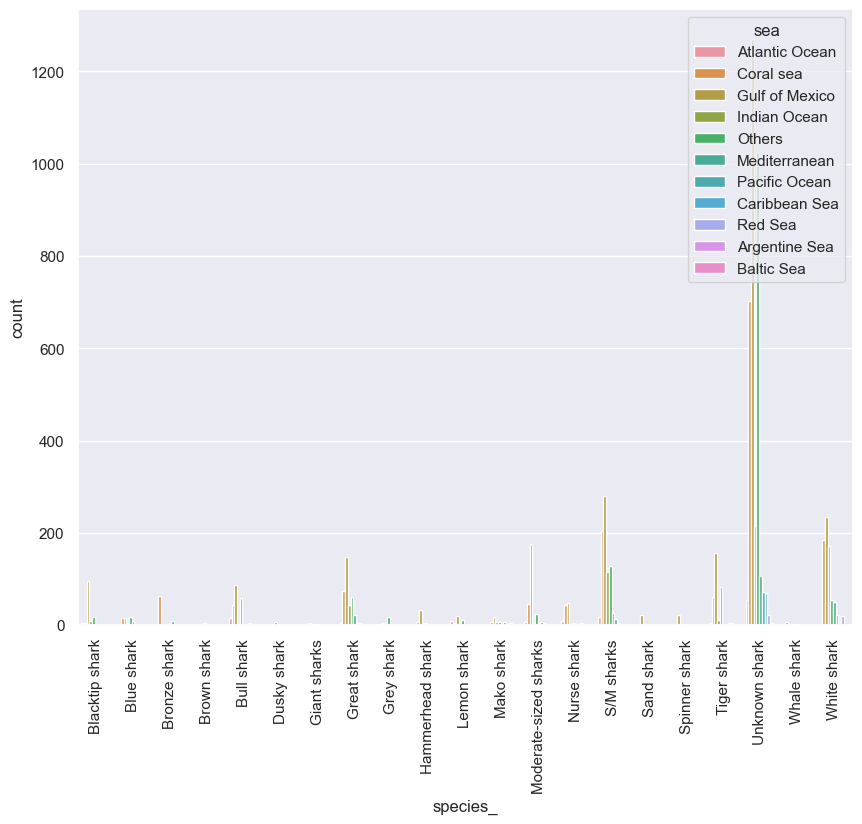

In [99]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.barplot(x='species_', y='count', hue='sea', data=count_data)
plt.xticks(rotation=90) 
plt.show()

### Aggregating our data:

In [71]:
quest_shark_attacks=quest_shark.pivot_table(index=['sex','year'] ,values=['type','activity'],aggfunc='sum')
quest_shark_attacks

activity  \
sex year                                                      
F   0     SwimmingOthersDivingOthersOthersDivingOthersDi...   
    1791                                             Others   
    1800                                             Others   
    1832                                            Fishing   
    1834                                           Swimming   
...                                                     ...   
M   2022  DivingSwimmingSwimmingDivingSurfingFishingSurf...   
    2023  SurfingDivingSurfingSurfingSurfingSwimmingDivi...   
    2024        SurfingFishingFishingSwimmingSurfingFishing   
    5                                                Others   
    77                                               Diving   

                                                       type  
sex year                                                     
F   0     UnprovokedUnprovokedUnprovokedUnprovokedUnprov...  
    1791                                         Unprovoked  
    1800                                         Unprovoked  
    1832                                         Unprovoked  
    1834                                         Unprovoked  
...                                                     ...  
M   2022  ProvokedUnprovokedUnprovokedUnprovokedUnprovok...  
    2023  UnprovokedUnprovokedUnprovokedUnprovokedUnprov...  
    2024  UnprovokedUnprovokedProvokedUnprovokedUnprovok...  
    5                                            Unprovoked  
    77                                           Unprovoked  

[505 rows x 2 columns]

In [72]:
count_attack=quest_shark.pivot_table(index=['sex','activity'] ,values=['type'],aggfunc='count')
count_attack

type
sex activity          
F   Bathing         21
    Diving          93
    Fishing         24
    Kayaking         6
    Multimedia       2
    Others         172
    Sea Disaster     2
    Surfing        149
    Swimming       234
    Wading          76
F/M Bathing          7
    Diving          26
    Fishing        171
    Kayaking         1
    Multimedia       1
    Others         274
    Sea Disaster     9
    Surfing         42
    Swimming        27
    Wading           3
M   Bathing        162
    Diving         566
    Fishing       1039
    Kayaking        35
    Multimedia      21
    Others        1027
    Sea Disaster    19
    Surfing       1592
    Swimming       986
    Wading         129

In [73]:
quest_shark['location'] = quest_shark['location'].str.replace(" ", "/")

In [74]:
quest_shark['sea'] = quest_shark['sea'].str.replace(" ", "/")

In [75]:
species_in_sea=quest_shark.pivot_table(index='species_',values=['sea','location'],aggfunc='sum')
species_in_sea

,location,sea
species_,,
Blacktip shark,"Anaehoomalu/BayProtea/BanksMyrtle/Beach,/Horry...",OthersGulf/of/MexicoIndian/OceanGulf/of/Mexico...
Blue shark,Rabdells/Beach/9/nm/off/Vila/do/Conde/Penzance...,MediterraneanOthersOthersOthersMediterraneanMe...
Bronze shark,"Alexander/Bay,/EsperanceLucy's/BeachAvocaYalli...",Coral/seaCoral/seaCoral/seaCoral/seaCoral/seaC...
Brown shark,"Caves/BeachCocoa/Beach,/Brevard/CountyKufulu/P...",Coral/seaGulf/of/MexicoOthersOthersOthersOthers
Bull shark,"Vaitarna/River,/Palghar/DistrictElizabeth/Bay,...",OthersCoral/seaCoral/seaGulf/of/MexicoCaribbea...
Dusky shark,"Windang,///////Lake/IllawaraVirginia/BeachPont...",Coral/seaGulf/of/MexicoOthersIndian/OceanIndia...
Giant sharks,"Keaton/Beach,/WeipaLa'aloa/Beach/ParkRamsgateN...",Gulf/of/MexicoCoral/seaGulf/of/MexicoIndian/Oc...
Great shark,"Cape/Canaveral,/Brevard/CountyJones/Beach,/Nas...",Gulf/of/MexicoGulf/of/MexicoGulf/of/MexicoGulf...
Grey shark,"Matavai/Bay,/Arue,/Papeteereef/40km/east/Vanua...",OthersOthersCoral/seaCoral/seaCoral/seaOthersO...


### Questionnaire:

This is a kind of questionnaire is for tourists that are planning for there holidays.

They will need to type the country and city that are planning to visit and they will get an answer of how many sharks attacks happened in that city and how many shark attacks happened in the whole country. 


In [76]:
#your_country=input("Which country would you like to travel to? ")

In [77]:
#your_state=input(f"Which state in {your_country} would you like to travel to? ")

In [78]:
#len(quest_shark.country)

In [79]:
#len(quest_shark.state)

In [80]:
#quest_shark.head()

In [81]:
#count_country=0
#quest_shark.country=quest_shark.country.str.lower()
#for i in range(len(quest_shark.country)):
#    if quest_shark.iloc[i,3]==your_country.lower():
#        count_country+=1
#print(count_country)

In [82]:
#count_state=0
#quest_shark.state=quest_shark.state.str.lower()
#for i in range(len(quest_shark.state)):
 #   if quest_shark.iloc[i,4]==your_state.lower():
  #      count_state+=1
#print(count_state)

In [100]:
def information_shark_attack():
    your_country=input("Which country would you like to travel to? ")
    your_state=input(f"Which state in {your_country} would you like to travel to? ")
    
    count_country=0
    quest_shark.country=quest_shark.country.str.lower()
    for i in range(len(quest_shark.country)):
        if quest_shark.iloc[i,3]==your_country.lower():
            count_country+=1
    count_state=0
    quest_shark.state=quest_shark.state.str.lower()
    for i in range(len(quest_shark.state)):
        if quest_shark.iloc[i,4]==your_state.lower():
            count_state+=1
    if count_country==0:
        print(f"There is  records of shark attacks in {your_country}")
    elif count_state==0 and count_country!=0:
        print(f"There is no records of shark attacks in {your_state}, however there are records of {count_country} shark attacks in {your_country}")
    else:
        percentage_shark_attack=round((count_state/count_country)*100,2)
        print(f"Based on previous information, {percentage_shark_attack}% of sharks attacks in {your_country} are in {your_state}")

In [101]:
information_shark_attack()

Which country would you like to travel to? Portugal
Which state in Portugal would you like to travel to? Porto
There is no records of shark attacks in Porto, however there are records of 4 shark attacks in Portugal
